In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [116]:
h1_df = pd.read_csv('data/H1.csv')

In [117]:
h1_df.shape

(40060, 31)

In [118]:
h1_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [119]:
time_series_h1 = h1_df.groupby(['ArrivalDateYear', 'ArrivalDateWeekNumber']).agg(
    count_total=('IsCanceled', 'count'),
    count_canceled=('IsCancelled', 'sum'),
    percent_canceled=('IsCanceled', 'mean')).reset_index()

In [120]:
time_series_h1.head()

,ArrivalDateYear,ArrivalDateWeekNumber,count_total,count_canceled,percent_canceled
0,2015,27,177,41,0.231638
1,2015,28,271,48,0.177122
2,2015,29,341,87,0.255132
3,2015,30,317,74,0.233438
4,2015,31,347,101,0.291066


In [121]:
time_series_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ArrivalDateYear        115 non-null    int64  
 1   ArrivalDateWeekNumber  115 non-null    int64  
 2   count_total            115 non-null    int64  
 3   count_canceled         115 non-null    int64  
 4   percent_canceled       115 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.6 KB


In [122]:
time_series_h1['ArrivalDate'] = time_series_h1.apply(lambda x: datetime.strptime('%dW%d Mon' % (x.ArrivalDateYear, x.ArrivalDateWeekNumber),
                                                                                 '%YW%U %a'), axis=1)

In [123]:
time_series_h1.head()

,ArrivalDateYear,ArrivalDateWeekNumber,count_total,count_canceled,percent_canceled,ArrivalDate
0,2015,27,177,41,0.231638,2015-07-06
1,2015,28,271,48,0.177122,2015-07-13
2,2015,29,341,87,0.255132,2015-07-20
3,2015,30,317,74,0.233438,2015-07-27
4,2015,31,347,101,0.291066,2015-08-03


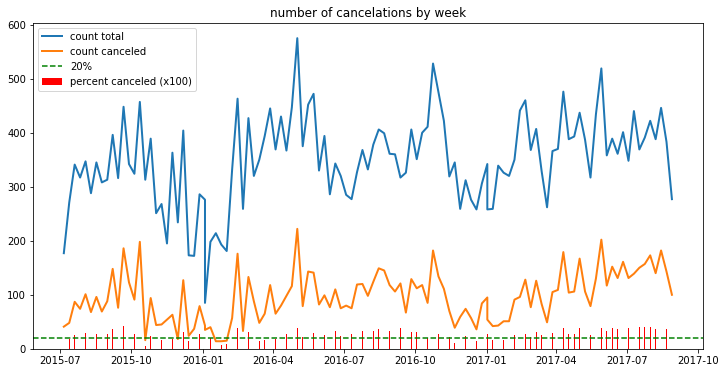

In [139]:
# plt.plot()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(time_series_h1['ArrivalDate'], time_series_h1['count_total'], lw=2, label="count total")
ax.plot(time_series_h1['ArrivalDate'], time_series_h1['count_canceled'], lw=2, label="count canceled")
ax.bar(time_series_h1['ArrivalDate'], time_series_h1['percent_canceled'] * 100, lw=2, color='r', label="percent canceled (x100)")
ax.axhline(20, color='g', linestyle="--", label='20%')
year_loc = mdates.MonthLocator(interval=3)
year_fmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_locator(year_loc)
ax.xaxis.set_major_formatter(year_fmt)
plt.legend()
plt.title('number of cancelations by week');